Iris Flower Classification - Data Analysis and Visualization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
df = pd.read_csv("Iris.csv")
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (150, 5)


In [26]:
print("First 5 rows of the dataset:")
display(df.head())

print(f"\nDataset Info:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names: {list(df.columns)}")

print(f"\nMissing values:")
print(df.isnull().sum())

print(f"\nDuplicate rows: {df.duplicated().sum()}")


First 5 rows of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Dataset Info:
Number of rows: 150
Number of columns: 5

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Duplicate rows: 3


In [6]:
if 'Id' in df.columns:
    data = df.drop('Id', axis=1)
else:
    data = df.copy()

print("Dataset after removing ID column:")
display(data.head())

print("\nUnique values per column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")
    if data[col].dtype == 'object':
        print(f"  Values: {data[col].unique()}")

Dataset after removing ID column:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa



Unique values per column:
sepal_length: 35 unique values
sepal_width: 23 unique values
petal_length: 43 unique values
petal_width: 22 unique values
species: 3 unique values
  Values: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Graph Types:

Pie Chart: Circular statistical graphic showing proportional data
Count Plot (Bar Chart): Vertical bars showing frequency counts

What They Represent:

Purpose: Show the distribution of the three iris species in the dataset
Insights: Reveals that the dataset is perfectly balanced with equal representation (50 samples each) of Iris-setosa, Iris-versicolor, and Iris-virginica
Usage: Helps identify if there's class imbalance that might affect analysis

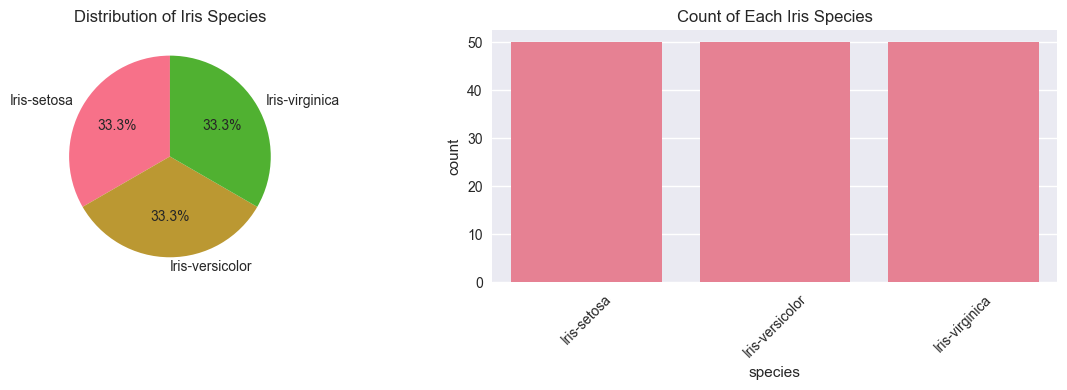

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
species_counts = data['species'].value_counts()
plt.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Iris Species')

plt.subplot(1, 2, 2)
sns.countplot(data=data, x='species')
plt.title('Count of Each Iris Species')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Graph Type:

Histograms (2x2 Grid): Frequency distribution plots showing data spread

What They Represent:

Purpose: Display the frequency distribution of each numerical feature across all species
Features Shown: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
Insights:

Shows if data follows normal distribution
Reveals outliers and data spread patterns
Identifies which features have wider or narrower ranges


Key Findings: Petal measurements typically show more variation than sepal measurements

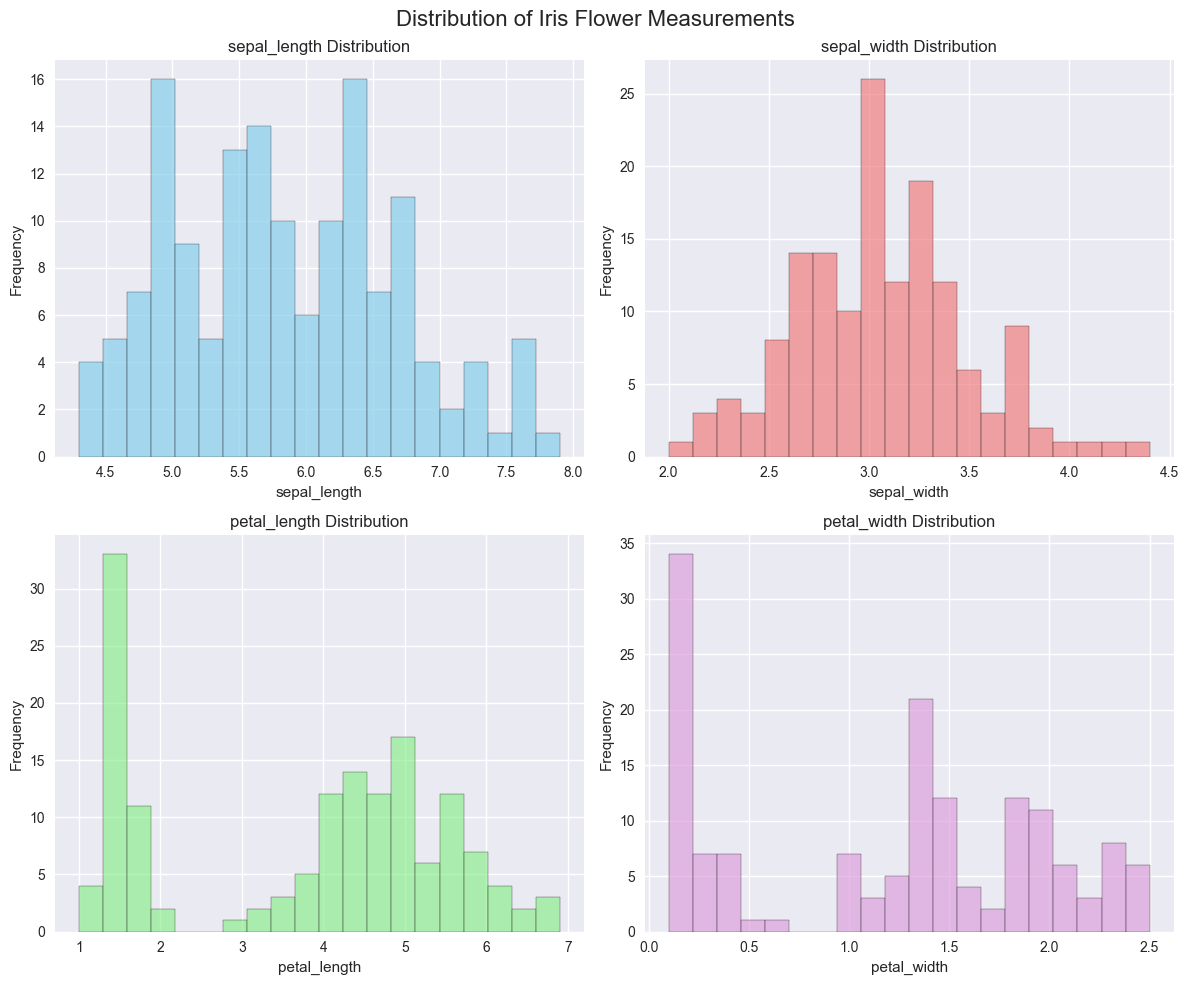

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Iris Flower Measurements', fontsize=16)

numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'plum']

for i, col in enumerate(numerical_cols):
    row = i // 2
    col_idx = i % 2
    axes[row, col_idx].hist(data[col], bins=20, color=colors[i], alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].set_xlabel(col.replace('Cm', ' (cm)'))
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Graph Type:

Box Plots (Box-and-Whisker Plots): Statistical plots showing five-number summary

What They Represent:

Purpose: Compare feature distributions across the three species
Elements:

Box: Interquartile range (IQR) - 25th to 75th percentile
Median line: Middle value (50th percentile)
Whiskers: Data range (typically 1.5 × IQR)
Outliers: Points beyond whiskers


Insights:

Species separation clarity
Feature variability within each species
Outlier identification


Key Findings: Iris-setosa shows clear separation from other species, especially in petal measurements

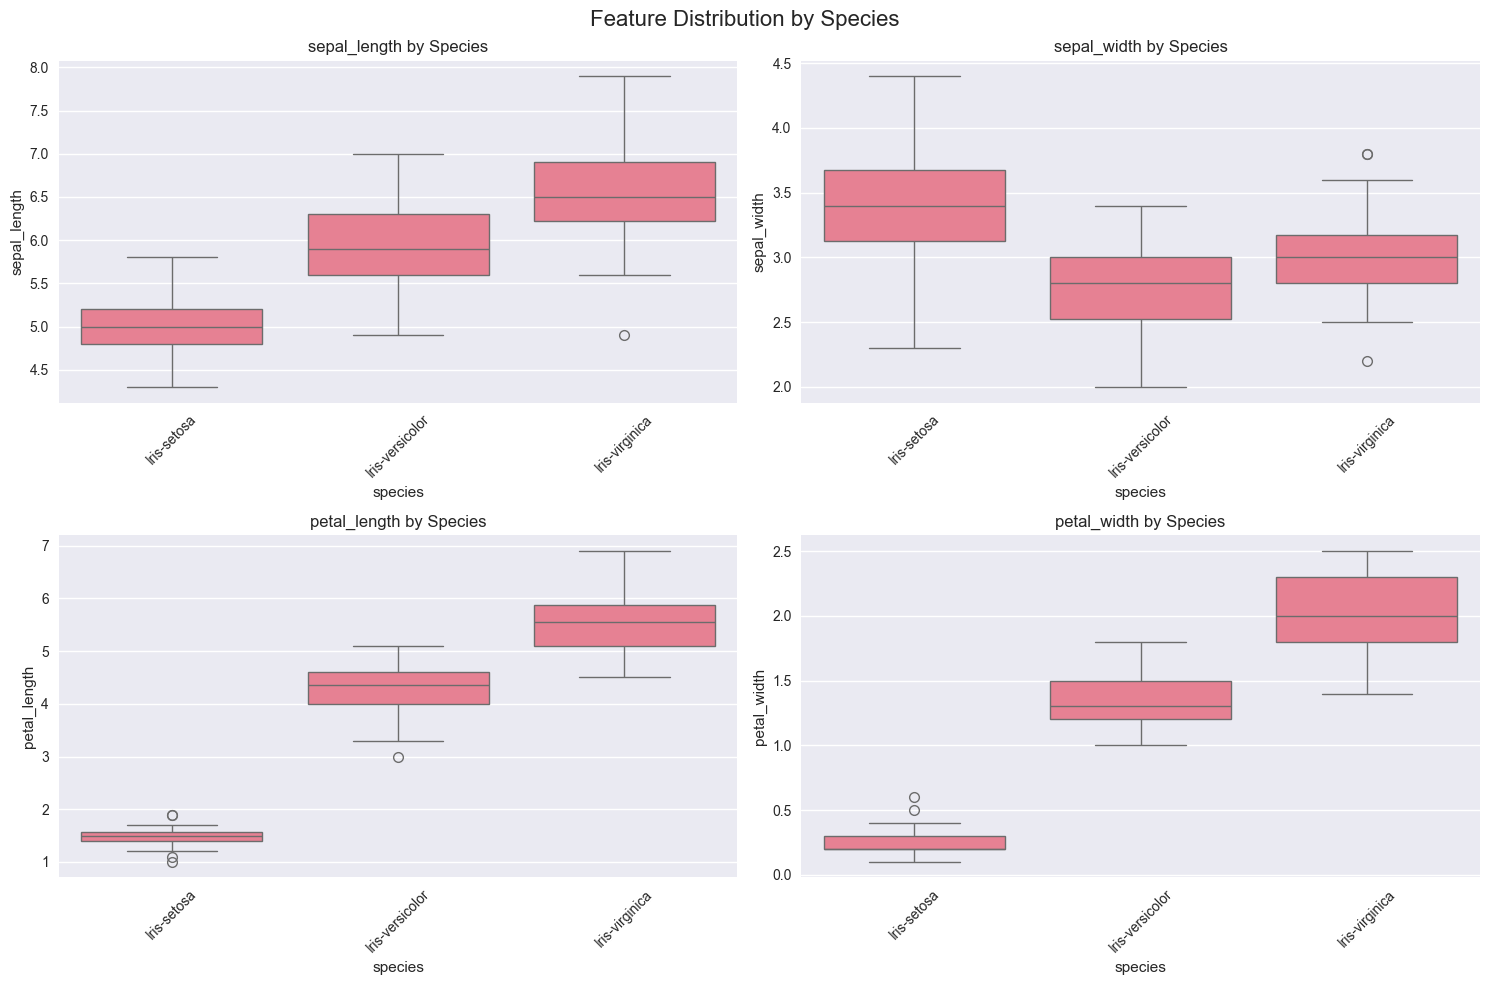

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Distribution by Species', fontsize=16)

for i, col in enumerate(numerical_cols):
    row = i // 2
    col_idx = i % 2
    sns.boxplot(data=data, x='species', y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} by Species')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Graph Type:

Violin Plots: Combination of box plots and kernel density estimation

What They Represent:

Purpose: Show both summary statistics and the probability density of data
Elements:

Width: Represents frequency/density at each value
Inner box: Quartiles and median (like box plots)
Shape: Distribution curve showing data concentration


Insights:

More detailed view of data distribution shape
Identifies bimodal or skewed distributions
Better understanding of data clustering


Advantages over Box Plots: Shows the actual distribution shape, not just summary statistics

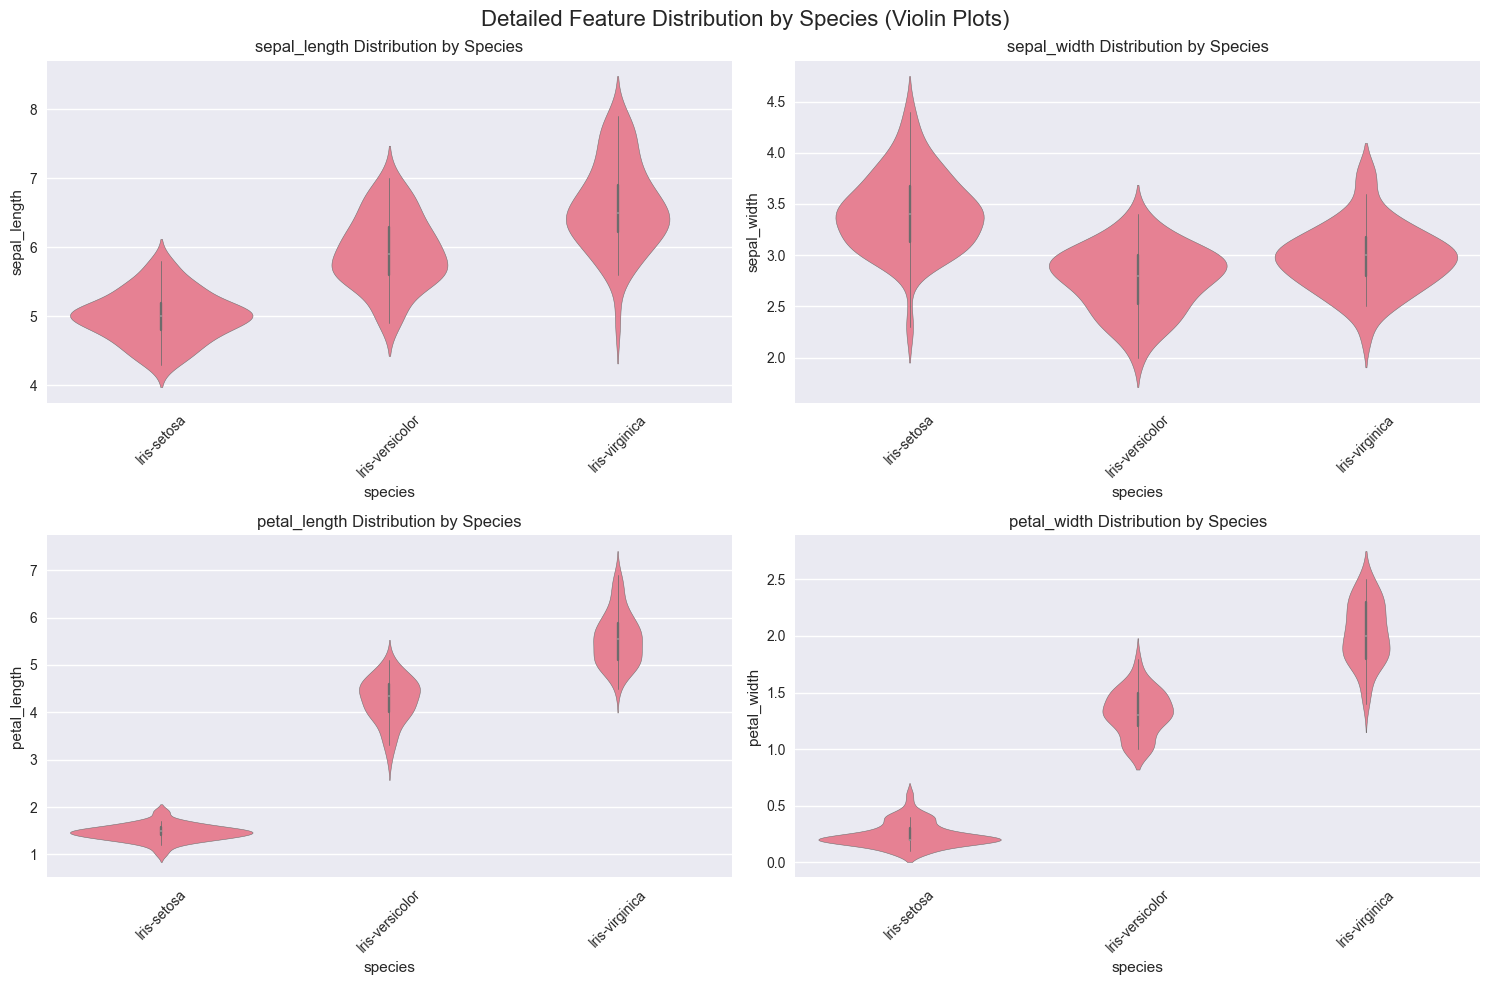

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Detailed Feature Distribution by Species (Violin Plots)', fontsize=16)

for i, col in enumerate(numerical_cols):
    row = i // 2
    col_idx = i % 2
    sns.violinplot(data=data, x='species', y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} Distribution by Species')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Graph Type:

Scatter Plots (2x3 Grid): Point plots showing relationship between two variables

What They Represent:

Purpose: Examine relationships between all possible pairs of features
Six Combinations:

Sepal Length vs Sepal Width
Petal Length vs Petal Width
Sepal Length vs Petal Length
Sepal Width vs Petal Width
Sepal Length vs Petal Width
Sepal Width vs Petal Length


Color Coding: Each species represented by different colors
Insights:

Linear relationships between features
Species clustering patterns
Feature discrimination power


Key Findings: Petal features show stronger species separation than sepal features

Graph Type:

Pair Plot Matrix: Comprehensive grid showing all pairwise relationships

What They Represent:

Purpose: Create a matrix of scatter plots for all feature combinations
Structure:

Off-diagonal: Scatter plots between different features
Diagonal: Histograms of individual features


Color Coding: Species differentiation through colors
Insights:

Complete overview of all feature relationships
Correlation patterns
Species separability across all dimensions


Advantages: Comprehensive view in a single visualization

<Figure size 1200x1000 with 0 Axes>

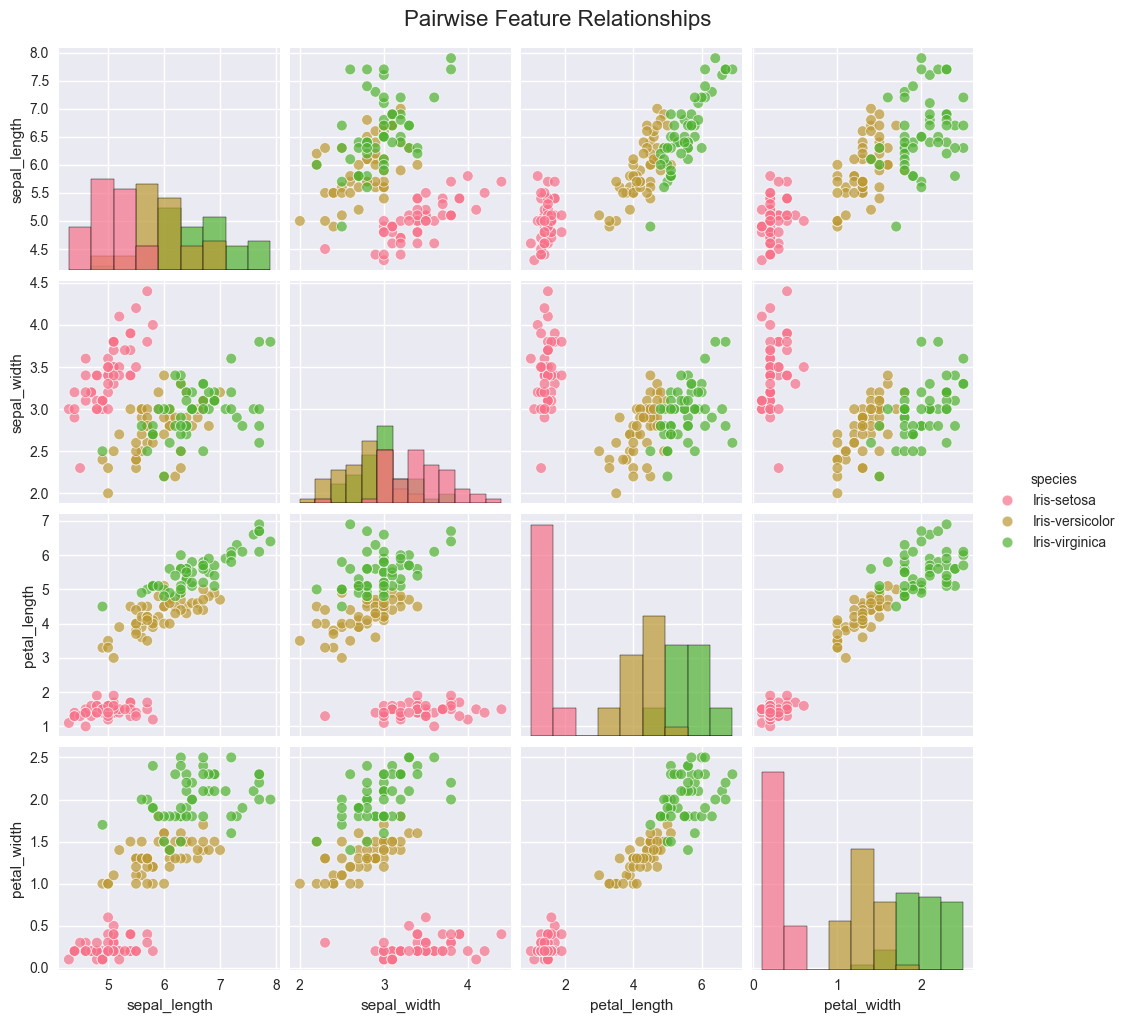

In [18]:
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(data, hue='species', diag_kind='hist', 
                        plot_kws={'alpha': 0.7, 's': 60}, 
                        diag_kws={'alpha': 0.7})
pair_plot.fig.suptitle('Pairwise Feature Relationships', y=1.02, fontsize=16)
plt.show()

Graph Type:

Heatmap: Color-coded matrix showing correlation coefficients

What They Represent:

Purpose: Quantify linear relationships between numerical features
Color Scale:

Red: Strong negative correlation
White/Yellow: No correlation
Blue: Strong positive correlation


Values: Pearson correlation coefficients (-1 to +1)
Features:

Triangular mask to avoid redundancy
Numerical values displayed in cells


Insights:

Strong positive correlation between petal length and petal width
Moderate correlations between sepal and petal measurements


Key Findings: Petal measurements are highly correlated, suggesting they might measure similar aspects of flower size

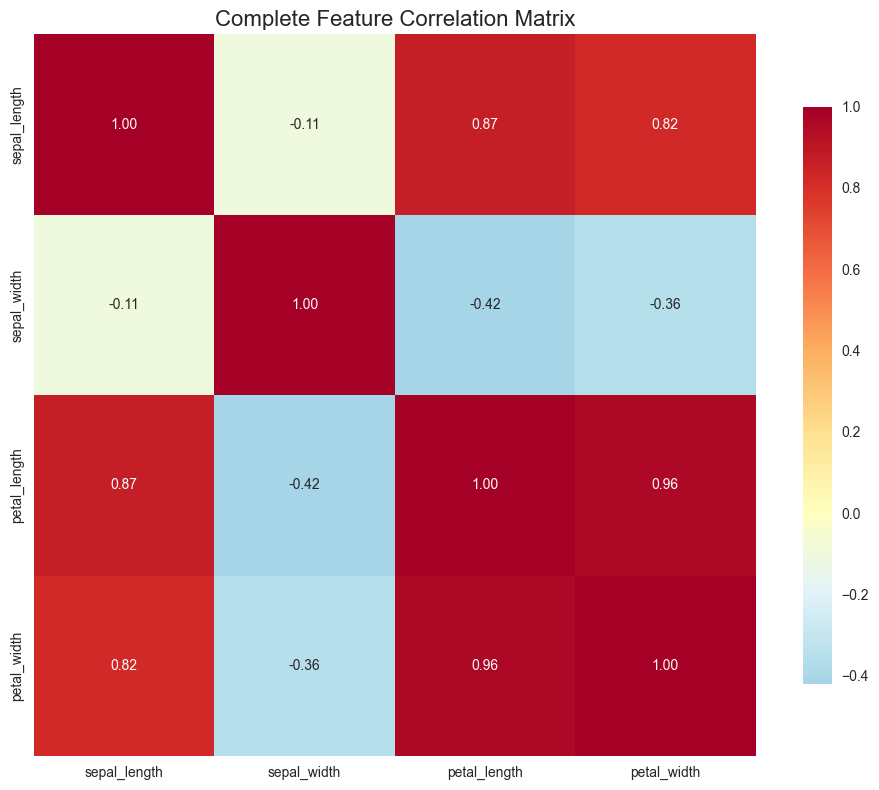

Complete Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length         1.000       -0.109         0.872        0.818
sepal_width         -0.109        1.000        -0.421       -0.357
petal_length         0.872       -0.421         1.000        0.963
petal_width          0.818       -0.357         0.963        1.000

Strong Correlations (|correlation| > 0.8):
sepal_length vs petal_length: 0.872
sepal_length vs petal_width: 0.818
petal_length vs petal_width: 0.963

Moderate Correlations (0.5 < |correlation| < 0.8):


In [27]:
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', 
           center=0, square=True, 
           cbar_kws={'shrink': 0.8}, fmt='.2f')
plt.title('Complete Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

print("Complete Correlation Matrix:")
print("="*50)
print(correlation_matrix.round(3))

print("\nStrong Correlations (|correlation| > 0.8):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.8:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")

print("\nModerate Correlations (0.5 < |correlation| < 0.8):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if 0.5 < abs(corr_value) < 0.8:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_value:.3f}")

Graph Type:

Tabular Data: Statistical summaries presented in table format

What They Represent:

Purpose: Provide numerical summaries for each species
Statistics Included:

Count, Mean, Standard Deviation
Minimum, 25th percentile, Median
75th percentile, Maximum


Organization: Separate tables for each species
Insights:

Quantitative comparison between species
Central tendencies and spread measures
Baseline statistics for further analysis

In [21]:
print("Statistical Summary by Species:")
print("="*50)
for species_name in data['species'].unique():
    print(f"\n{species_name.upper()}:")
    species_data = data[data['species'] == species_name]
    print(species_data[numerical_cols].describe().round(2))

Statistical Summary by Species:

IRIS-SETOSA:
       sepal_length  sepal_width  petal_length  petal_width
count         50.00        50.00         50.00        50.00
mean           5.01         3.42          1.46         0.24
std            0.35         0.38          0.17         0.11
min            4.30         2.30          1.00         0.10
25%            4.80         3.12          1.40         0.20
50%            5.00         3.40          1.50         0.20
75%            5.20         3.68          1.58         0.30
max            5.80         4.40          1.90         0.60

IRIS-VERSICOLOR:
       sepal_length  sepal_width  petal_length  petal_width
count         50.00        50.00         50.00        50.00
mean           5.94         2.77          4.26         1.33
std            0.52         0.31          0.47         0.20
min            4.90         2.00          3.00         1.00
25%            5.60         2.52          4.00         1.20
50%            5.90         2.80    

Graph Type:

Overlapping Histograms: Multiple histograms layered with transparency

What They Represent:

Purpose: Compare distribution shapes across species for each feature
Structure: Four separate plots (one per feature)
Transparency: Alpha blending allows overlap visualization
Normalization: Density plots for fair comparison
Insights:

Distribution shape differences between species
Overlap and separation patterns
Feature discrimination effectiveness


Advantages: Clear comparison of distribution shapes while maintaining individual species identity

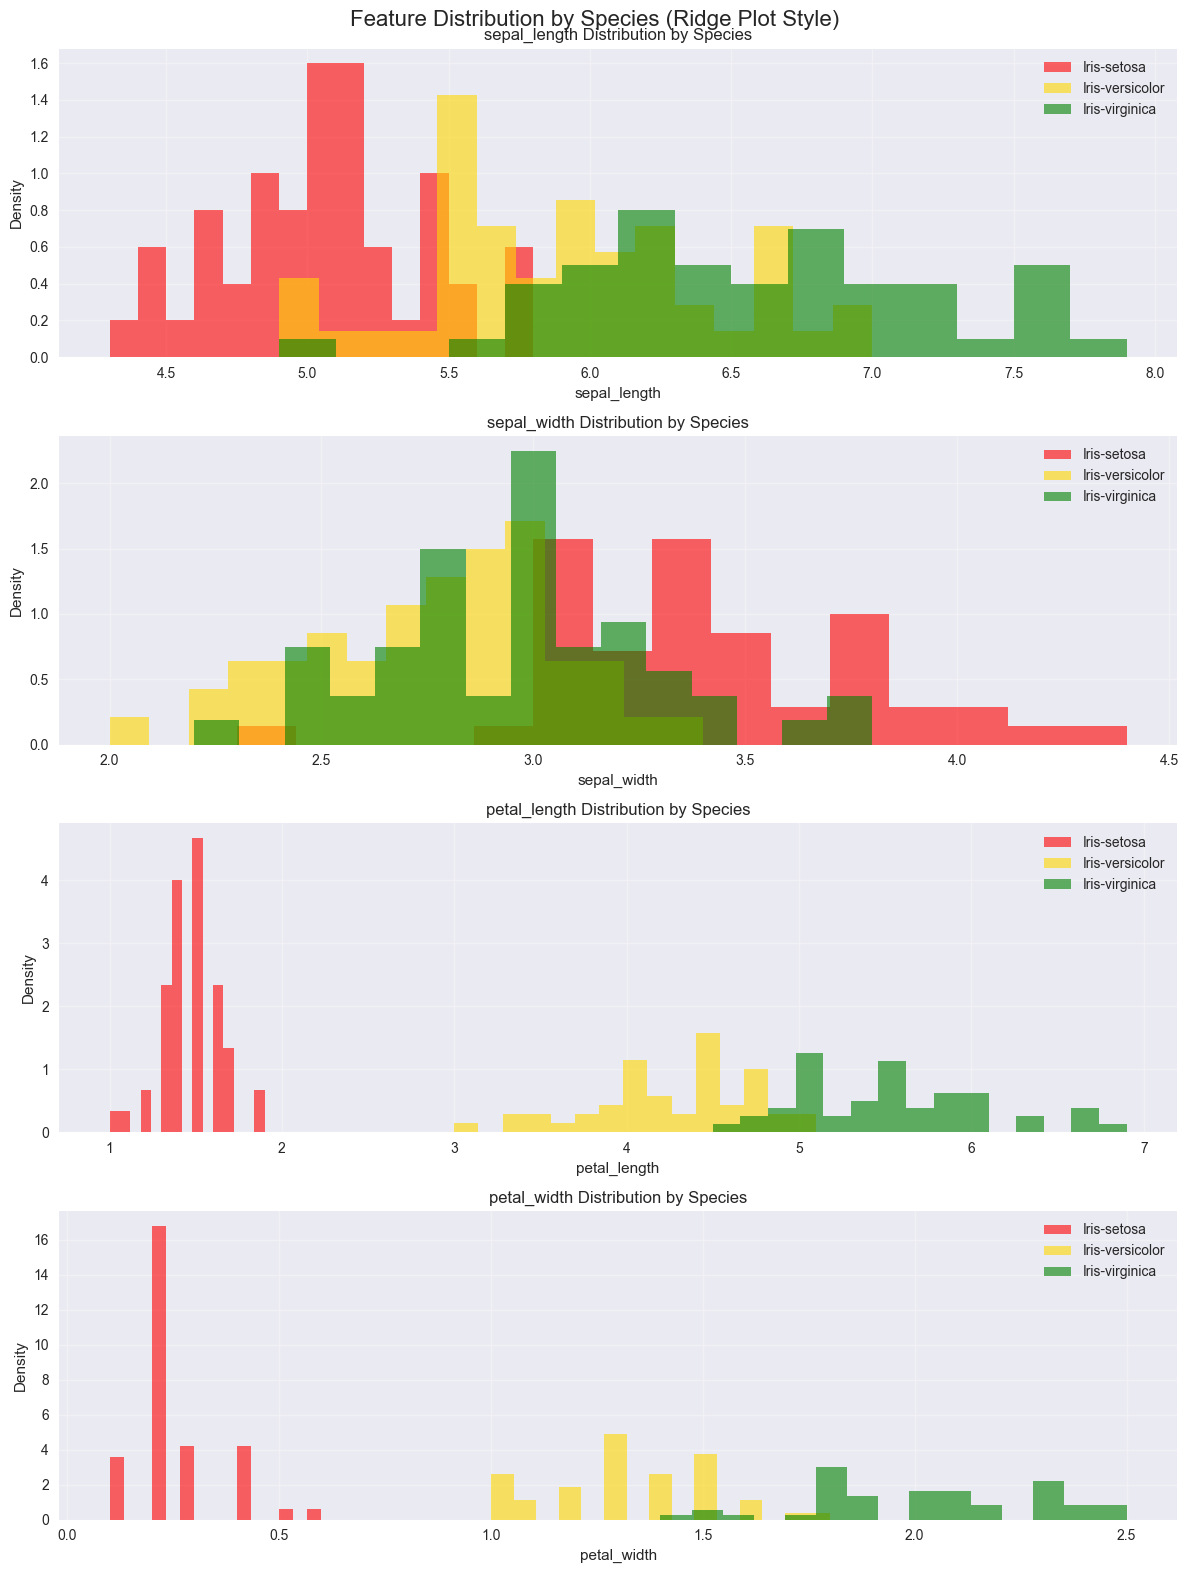

In [23]:
fig, axes = plt.subplots(4, 1, figsize=(12, 16))
fig.suptitle('Feature Distribution by Species (Ridge Plot Style)', fontsize=16)

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    for j, spec in enumerate(species):
        species_data = data[data['species'] == spec]
        ax.hist(species_data[col], alpha=0.6, label=spec, bins=15, 
               color=colors[j], density=True)
    ax.set_title(f'{col} Distribution by Species')
    ax.set_xlabel(col.replace('Cm', ' (cm)'))
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Graph Type:

Bar Chart with Table: Grouped bar chart showing variability measures

What They Represent:

Purpose: Compare relative variability of features across species
Metric: Coefficient of Variation (CV) = (Standard Deviation / Mean) × 100
Structure:

Table: Numerical CV values
Bar Chart: Visual representation of variability


Insights:

Which features are most/least variable within each species
Species consistency in measurements
Feature reliability for classification


Key Findings: Different species show varying levels of consistency in different measurements

Coefficient of Variation by Species (Higher = More Variable):


,sepal_length,sepal_width,petal_length,petal_width
Iris-setosa,7.04,11.15,11.85,43.94
Iris-versicolor,8.70,11.33,11.03,14.91
Iris-virginica,9.65,10.84,9.94,13.56


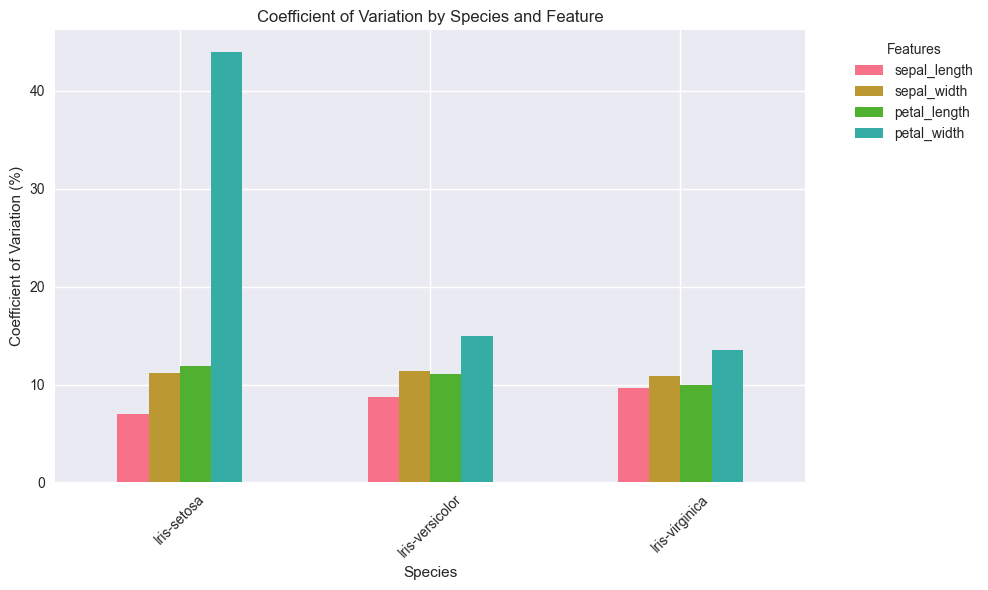


Dataset Analysis Complete!
Key Findings:
- Dataset contains 150 samples with 4 numerical features
- Equal distribution of 50 samples per species
- No missing values or duplicates
- Strong correlation between petal length and petal width
- Clear separation between species in petal measurements
- Iris-setosa shows distinct characteristics from other species


In [25]:
print("Coefficient of Variation by Species (Higher = More Variable):")
print("="*60)
cv_results = {}
for col in numerical_cols:
    cv_results[col] = {}
    for spec in species:
        species_data = data[data['species'] == spec][col]
        cv = (species_data.std() / species_data.mean()) * 100
        cv_results[col][spec] = cv

cv_df = pd.DataFrame(cv_results).round(2)
display(cv_df)

plt.figure(figsize=(10, 6))
cv_df.plot(kind='bar', ax=plt.gca())
plt.title('Coefficient of Variation by Species and Feature')
plt.xlabel('Species')
plt.ylabel('Coefficient of Variation (%)')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nDataset Analysis Complete!")
print("="*50)
print("Key Findings:")
print("- Dataset contains 150 samples with 4 numerical features")
print("- Equal distribution of 50 samples per species")
print("- No missing values or duplicates")
print("- Strong correlation between petal length and petal width")
print("- Clear separation between species in petal measurements")
print("- Iris-setosa shows distinct characteristics from other species")